A hypothesis test is a statistical method that uses sample data (statistics, e.g., sample mean or average) to evaluate hypothesis about population (parameters, e.g., population mean).
<br> <br>

Since we assume that a treatment only affects the mean of the population (a shift along the x-axis, see below), not changing the shape or variance, we only need to worry about this parameter.
<br> <br>

A distribution plot of the theoretical population of human heights can be seen below: 

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
from scipy.integrate import cumtrapz
from itertools import product
from functools import reduce
from scipy.stats import t

### Theoretical distribution of human heights

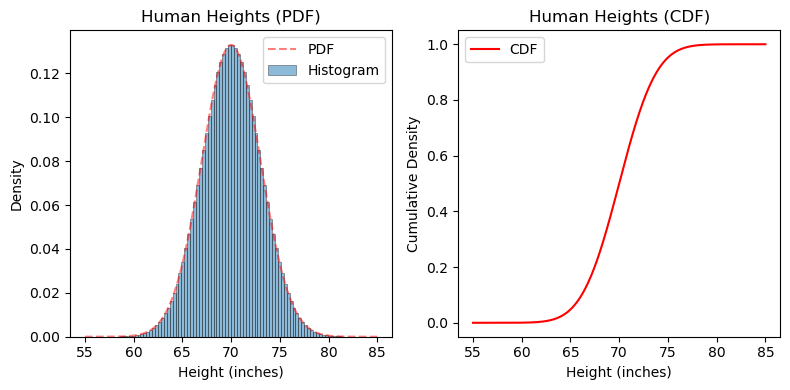

In [2]:
# Human heights
def normal_distribution(x, mu, sigma):
    pdf_values = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    return pdf_values

def get_histogram_values(x_vals, y_vals, start, end, num_bins):
    bin_width = (end - start) / num_bins
    bins = np.linspace(start, end, num_bins + 1)
    mid_x_values = bins[:-1] + bin_width / 2
    pdf_values = [y_vals[np.argmin(np.abs(x_vals - x))] for x in mid_x_values]
    # print(f"Elements of the population: {mid_x_values}")
    return mid_x_values, pdf_values

def plot_distribution(axes, x_values, pdf_curve, mid_x_values, pdf_values, bin_width, title, xlabel, ylabel):
    axes.plot(x_values, pdf_curve, label='PDF', color='red', linestyle='dashed', alpha=0.5, linewidth=1.5)
    axes.bar(mid_x_values, pdf_values, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label='Histogram')
    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.legend()

    
### MAIN ###

num_bins = 100
mean_height = 70
std_height = 3
lowest_height = 55
highest_height = 85

x_values = np.linspace(lowest_height, highest_height, 1000)
pdf_curve = [normal_distribution(x, mean_height, std_height) for x in x_values]

mid_x_values, pdf_values = get_histogram_values(x_values, pdf_curve, lowest_height, highest_height, num_bins)

# Calculate CDF
cdf_curve = cumtrapz(pdf_curve, x_values, initial=0)

# Plot PDF
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plot_distribution(axes[0], x_values, pdf_curve, mid_x_values, pdf_values, (highest_height - lowest_height) / len(mid_x_values), 'Human Heights (PDF)', 'Height (inches)', 'Density')

# Plot CDF
axes[1].plot(x_values, cdf_curve, label='CDF', color='red', linestyle='-', linewidth=1.5)
axes[1].set_title('Human Heights (CDF)')
axes[1].set_xlabel('Height (inches)')
axes[1].set_ylabel('Cumulative Density')
axes[1].legend()

plt.tight_layout()
plt.show()


### Random sample from the population

In [3]:
def plot_distribution_with_random_samples(sample_size, lowest_val, highest_val, mean, std):

    fig, ax = plt.subplots(figsize=(6, 4))

    x_values = np.linspace(lowest_val, highest_val, 1000)
    pdf_curve = [normal_distribution(x, mean, std) for x in x_values]

    bin_width = (highest_val - lowest_val) / num_bins
    mid_x_values, pdf_values = get_histogram_values(x_values, pdf_curve, lowest_val, highest_val, num_bins)

    ax.plot(x_values, pdf_curve, label='PDF', color='red', linestyle='dashed', alpha=0.5, linewidth=1.5)
    ax.bar(mid_x_values, pdf_values, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label='Histogram')

    # Generate random red points below the curve
    random_x = np.random.uniform(lowest_val, highest_val, sample_size)
    random_y = [np.random.uniform(0, normal_distribution(x, mean, std)) for x in random_x]

    # Plot the red points and add to the legend
    ax.scatter(random_x, random_y, color='red', label='Random sample')

    ax.set_title('Distribution (PDF)')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

    plt.tight_layout()
    plt.show()


### MAIN ###
slider_sample_size = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Sample size:', continuous_update=False)

# Removed slider_num_bins and directly passed num_bins=1 in the function call
widgets.interactive(plot_distribution_with_random_samples, sample_size=slider_sample_size, lowest_val=fixed(lowest_height), highest_val=fixed(highest_height), mean=fixed(mean_height), std=fixed(std_height))


interactive(children=(IntSlider(value=10, continuous_update=False, description='Sample size:', min=1), Output(…

A common use of the hypothesis testing is to compare a population before and after a treatment.

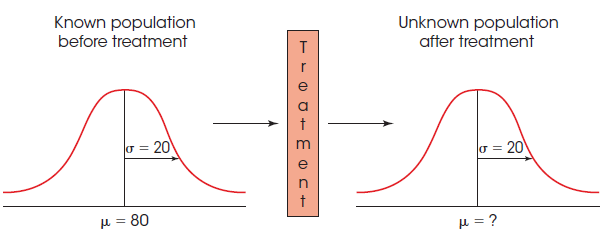

We assume that when the treatment has an effect, it will add a constant amount to each element of the population, so there will be a **shift in the population mean** but the shape of the population and its variability won't change. In the case of an effect, we say that we have 2 populations, one before treatment and one after treatment.

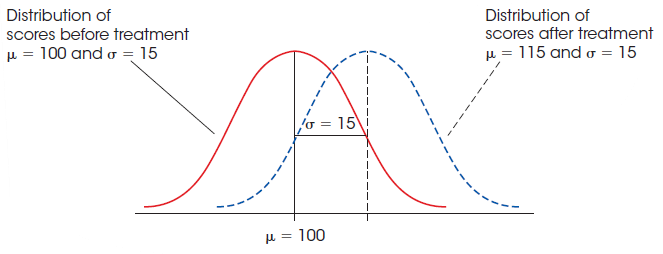

If we know the probability density function (PDF) of a population, we know the probability of drawing any element of this population. Some elements are more rare and some elements are more common. So, if we take a sample of this population, we will have a sample containing rare and common elements. But how common is each sample? We can quantify it by:
1. making a list of all possible sample permutations
2. calculating the mean of each sample
3. grouping the samples by their means 
4. finding the probability of each mean-group: number of the samples with the same mean/total number of samples

The distribution plot of this data is called as the sampling distribution of sample means (SDSM).

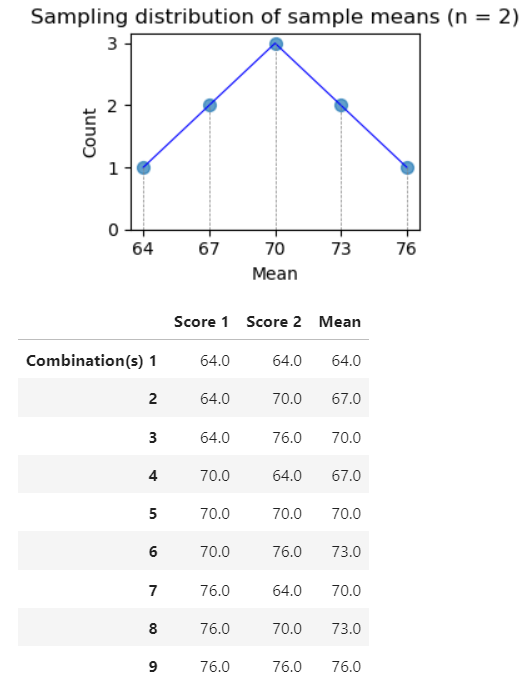
___
**Why do we group the samples by their means and not by their probabilities?**
 
The sampling distribution of sample probabilities curve lacks many useful properties (see cell far below)
___

Now that we have the sampling distribution of sample means, we can choose a decision boundary ($ \alpha $) to classify the samples as rare or common. Rare samples are located in the both extremes of the SDSM distribution. The probability of getting extreme samples ($ p < \alpha $) is the critical area divided by the total area under the curve. We then assume that if the sample is common, it comes from the treatment-has-no-effect population ($ H_0 $ population) but if the sample is rare, it comes from a treatment-has-significant-effect population ($ H_1 $ population). A rare sample in $ H_0 $ is a common sample in $ H_1 $.

**SDSM:**

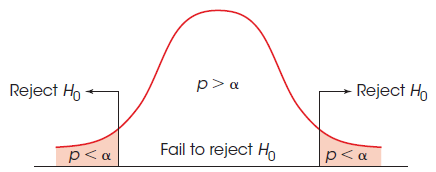

**In summary, to decide whether a sample is common or rare, we analyze its SDSM distribution** 

In [4]:
def understanding_sdms(sample_size, num_bins):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    # Assuming lowest_height, highest_height, mean_height, and std_height are defined somewhere else in the code
    x_values = np.linspace(lowest_height, highest_height, 1000)
    pdf_curve = [normal_distribution(x, mean_height, std_height) for x in x_values]

    bin_width = (highest_height - lowest_height) / num_bins
    mid_x_values, pdf_values = get_histogram_values(x_values, pdf_curve, lowest_height, highest_height, num_bins)

    print(f'Unique values: {mid_x_values}')
    
    ax[0].plot(x_values, pdf_curve, label='PDF', color='red', linestyle='dashed', alpha=0.5, linewidth=1.5)
    ax[0].bar(mid_x_values, pdf_values, width=bin_width, alpha=0.5, edgecolor='black', linewidth=0.5, label='Histogram')
    
    # Plotting red dots and text if num_bins > 2
    ax[0].plot(mid_x_values, np.zeros(len(mid_x_values)), 'ro') # Red dot for first bin
    ax[0].plot(mid_x_values, np.zeros(len(mid_x_values)), 'ro') # Red dot for last bin
    if num_bins > 2:
        
        ax[0].annotate('There is a\nbin here!', xy=(mid_x_values[0], 0), xytext=(mid_x_values[0], 0.02),
                       arrowprops=dict(facecolor='black', shrink=0.2, width=1, headwidth=3), fontsize=10, ha='center')
        ax[0].annotate('There is a\nbin here!', xy=(mid_x_values[-1], 0), xytext=(mid_x_values[-1], 0.02),
                       arrowprops=dict(facecolor='black', shrink=0.2, width=1, headwidth=3), fontsize=10, ha='center')
    
    ax[0].set_title('Distribution (PDF)')
    ax[0].set_xlabel('Height') # Set label to Height
    ax[0].set_ylabel('Frequency')
    ax[0].legend()
    ax[0].set_yticks([]) # Hide y_ticks and labels

    
    # Plot Pairs of Black and Red Segments and Text Labels
    segments_length = 1 / (num_bins * 2) # Ensure no space between pairs of lines
    for i in range(sample_size):
        start_x_black = i * segments_length * 2
        end_x_black = start_x_black + segments_length
        start_x_red = end_x_black
        end_x_red = start_x_red + segments_length
        ax[1].hlines(0.5, start_x_black, end_x_black, color='black', linewidth=0.5)
        ax[1].hlines(0.5, start_x_red, end_x_red, color='white', linewidth=0.5)
        ax[1].text((start_x_black + end_x_black) / 2, 0.45, str(int(num_bins)), ha='center', fontsize=8) # Bin number from the first plot
        if i < sample_size - 1:
            ax[1].text((start_x_red + end_x_red) / 2, 0.45, '*', ha='center', fontsize=20) # Plot asterisk

    ax[1].set_title(f"Number of means (SDMS):\n\n\n" + r"${unique\_vals}^{(sample\_size)} =$" + r'$' + f'{num_bins}' + r'^{' + f'{sample_size}' + r'}$', fontsize=15)
    ax[1].text(0, 0, "The frequency of each unique_val does NOT matter for SDMS!", fontsize=14) # Bin number from the first plot
    ax[1].set_ylim(-0.5, 1) # Set y limits to allow space for the text
    ax[1].axis('off') # Hide axis

    # Manual positioning of the axes to avoid overlap
    ax[0].set_position([0.05, 0.1, 0.45, 0.8])
    ax[1].set_position([0.55, 0.1, 0.45, 0.8])

    plt.show()

slider_num_bins = widgets.IntSlider(value=10, min=1, max=100, step=1, description='Unique vals:', continuous_update=False)
slider_sample_size = widgets.IntSlider(value=5, min=5, max=30, step=1, description='Sample size:', continuous_update=False) # Sample size starts at 5

widgets.interactive(understanding_sdms, sample_size=slider_sample_size, num_bins=slider_num_bins)


interactive(children=(IntSlider(value=5, continuous_update=False, description='Sample size:', max=30, min=5), …

### Discretized distribution of human heights

Num bins: 3
Total counts:11
Mean: 70.0


,X,Total counts
0,64.0,2
1,70.0,7
2,76.0,2


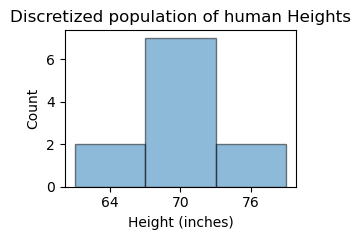

In [5]:
def discretize_curve(f, start, end, n_bins, total_count):
    bin_edges = np.linspace(start, end, n_bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
    bin_centers = np.round(bin_centers, 2)  # Round bin_centers to two decimal places
    bin_width = (end - start) / n_bins
    densities = np.array([np.mean(f(np.linspace(edge, bin_edges[i+1], 100), mean_height, std_height)) for i, edge in enumerate(bin_edges[:-1])])
    float_counts = densities * total_count / sum(densities)
    int_counts = np.round(float_counts).astype(int)
    non_zero_indices = int_counts != 0
    bin_centers = bin_centers[non_zero_indices]
    int_counts = int_counts[non_zero_indices]
    return bin_centers, int_counts


def plot_discretized_distribution(ax, centers, counts, bin_width, title, xlabel, ylabel):
    ax.bar(centers, counts, width=bin_width, alpha=0.5, edgecolor='k')
    ax.set_xticks(centers)
    if len(centers) > 12:
        ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    
### MAIN ###

approx_num_bins = 5
total_count = 10

centers_bins, counts_bins = discretize_curve(normal_distribution, lowest_height, highest_height, approx_num_bins, total_count)

mean_heights = np.average(centers_bins, weights=counts_bins)  # Weighted mean based on counts
print(f"Num bins: {len(centers_bins)}\nTotal counts:{sum(counts_bins)}\nMean: {mean_heights}")
dnormal_distribution = pd.DataFrame({'X': centers_bins, 'Total counts': counts_bins})
display(dnormal_distribution)

# Plot
bin_width = (highest_height - lowest_height) / approx_num_bins
fig, ax = plt.subplots(figsize=(3, 2.5))
plot_discretized_distribution(ax, centers_bins, counts_bins, bin_width, "Discretized population of human Heights", "Height (inches)", "Count")

plt.tight_layout()
plt.show()

### Effect of taking samples without replacement from the original (discretized) population - [WE DON'T DO THAT!]
We don't use sampling without replacement because the removal of one element would affect the drawing probability of the other elements. In any case, our theoretical population should be very very large (in fact, infinite) so that the drawing of one element shouldn't affect the probability of draining another one.

In [6]:
def sample_without_replacement(population, n_samples_without_replacement):
    samples = np.random.choice(population, n_samples_without_replacement, replace=False)
    return samples

def plot_samples(n_samples_without_replacement, bin_width, centers_bins, counts_bins, population):
    samples = sample_without_replacement(population, n_samples_without_replacement)
    centers, counts = np.unique(samples, return_counts=True)

    # Create a DataFrame for the current samples
    sample_df = pd.DataFrame(samples.reshape(-1, 1).T, columns=[f"obs {i+1}" for i in range(n_samples_without_replacement)])
    # sample_df.index = ["sample"]
    display(sample_df)  # Display the DataFrame
    sample_mean = np.mean(samples)
    print(f"Sample mean: {sample_mean:.2f}")

    fig, ax = plt.subplots(figsize=(3, 2.5))  # Create a new figure

    # Plot original distribution
    plot_discretized_distribution(ax, centers_bins, counts_bins, bin_width, 
                                  "Discretized population of human Heights", "Height (inches)", "Count")

    # Overlay sampled distribution
    plot_discretized_distribution(ax, centers, counts, bin_width, 
                                  f'Dist. Human heights ({n_samples_without_replacement} samples without replacement)',
                                  'Height (inches)', 'Count')

    plt.tight_layout()
    plt.show()

    
### MAIN ###    
# Define counts and centers
centers_bins, counts_bins = discretize_curve(normal_distribution, 55, 85, approx_num_bins, total_count)

# Create the population directly without the create_population function
population = np.repeat(dnormal_distribution['X'].values, dnormal_distribution['Total counts'].values)

samples_slider = widgets.IntSlider(value=1, min=1, max=sum(counts_bins), description='Samples:')
interactive_plot = interactive(plot_samples, n_samples_without_replacement=samples_slider, bin_width=widgets.fixed(bin_width), centers_bins=widgets.fixed(centers_bins), counts_bins=widgets.fixed(counts_bins), population=widgets.fixed(population))
display(interactive_plot)


interactive(children=(IntSlider(value=1, description='Samples:', max=11, min=1), Output()), _dom_classes=('wid…

### Sampling distribution of sample means (all possible sampling combinations with replacement)

Sampling with replacement ensures that each sample drawn is independent of the others. When you sample without replacement, each sample drawn affects the probabilities of subsequent draws, leading to dependence between the samples. This dependence can bias the results and make the sampling distribution of the sample means less representative of the actual population.

**REMARK**: 
1. the sample size can be as large as we want to. If we were annotating human heights, we would choose a human, annotate its height, and then put him back in the original population.
2. Note that the frequency of each element of the population are not taking into account when building the SDSM curve, so the final shape of it should be similar for populations with any PDF.

In [7]:
def create_df_all_combinations_with_replacement(df, sample_size):
    """Calculate all possible combinations (with repetition) of obs and their mean."""
    all_combs = list(product(df['X'].unique(), repeat=sample_size))
    
    columns = [f"Score {i+1}" for i in range(sample_size)] + ['Mean']
    df_combinations = pd.DataFrame(all_combs, columns=columns[:-1])
    df_combinations['Mean'] = df_combinations.mean(axis=1).round(2)
    first_index = "Combination(s) 1"
    other_indices = [f"{i+1}" for i in range(1, len(all_combs))]
    df_combinations.index = [first_index] + other_indices
    return df_combinations

def plot_sdsm(sample_size):
    dfs = {'human heights': create_df_all_combinations_with_replacement(dnormal_distribution, sample_size)}

    for title, df in dfs.items():
        unique_obs = df.iloc[:, :-1].values.flatten()
        unique_obs = pd.Series(unique_obs).unique()
        
        # print(f"{title.capitalize()}\n")
        # print(f"Number of obs = {sample_size}")
        # print(f"Count of {title} obs: {len(unique_obs)}")
        # print(f"Possible {title} values: {unique_obs}\n")
       
        mean_counts = df.groupby('Mean').size().reset_index(name='Counts')

        # print(f"Count of unique mean values: {len(mean_counts)}")
        # print(f"Possible mean values: {mean_counts['Mean'].values}\n")
    

        fig, ax = plt.subplots(figsize=(3, 2.5))

        ax.scatter(mean_counts['Mean'], mean_counts['Counts'], alpha=0.7, s=50)
        ax.plot(mean_counts['Mean'], mean_counts['Counts'], color='blue', linewidth=0.8)
        for _, row in mean_counts.iterrows():
            ax.plot([row['Mean'], row['Mean']], [0, row['Counts']], linestyle='--', color='grey', linewidth=0.5)
        ax.set_title(f"Sampling distribution of sample means (n = {sample_size})")
        ax.set_xlabel('Mean')
        ax.set_ylabel('Count')
            
        if len(mean_counts['Mean']) > 30:
            ax.set_xticks(np.linspace(mean_counts['Mean'].min(), mean_counts['Mean'].max(), 10))
        else:
            ax.set_xticks(mean_counts['Mean'].values)
        ax.set_ylim(0,)
        if len(mean_counts['Mean']) > 12:
            ax.tick_params(axis='x', rotation=90)

        plt.tight_layout()
        plt.show()

        display(df)
        

interact(plot_sdsm, sample_size=(1, sum(counts_bins) + 5, 1));


interactive(children=(IntSlider(value=8, description='sample_size', max=16, min=1), Output()), _dom_classes=('…

In [8]:
def plot_sdsm(df, sample_size, counts_bins):
    # Calculate all possible combinations (with repetition) of obs and their mean
    all_combs = list(product(df['X'].unique(), repeat=sample_size))
    columns = [f"Score {i+1}" for i in range(sample_size)] + ['Mean']
    df_combinations = pd.DataFrame(all_combs, columns=columns[:-1])
    df_combinations['Mean'] = df_combinations.mean(axis=1).round(2)

    # Generate scatter plot
    mean_counts = df_combinations.groupby('Mean').size().reset_index(name='Counts')
    fig, ax = plt.subplots(figsize=(3, 2.5))
    ax.scatter(mean_counts['Mean'], mean_counts['Counts'], alpha=0.7, s=50)
    ax.plot(mean_counts['Mean'], mean_counts['Counts'], color='blue', linewidth=0.8)
    for _, row in mean_counts.iterrows():
        ax.plot([row['Mean'], row['Mean']], [0, row['Counts']], linestyle='--', color='grey', linewidth=0.5)
    ax.set_title(f"Sampling distribution of sample means (n = {sample_size})")
    ax.set_xlabel('Mean')
    ax.set_ylabel('Count')

    if len(mean_counts['Mean']) > 30:
        ax.set_xticks(np.linspace(mean_counts['Mean'].min(), mean_counts['Mean'].max(), 10))
    else:
        ax.set_xticks(mean_counts['Mean'].values)

    ax.set_ylim(0,)
    if len(mean_counts['Mean']) > 12:
        ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()
    
    
### MAIN ###

df_mini_pop_dist = dnormal_distribution.iloc[:, :2]
print("Input mini-pop dist")
display(df_mini_pop_dist)


# max_sample_size = sum(counts_bins) + 5 # the "5" is a random integer, just to remind us we can have a sample size bigger than the population size
# interact(lambda sample_size: plot_sdsm(dnormal_distribution, sample_size, counts_bins), sample_size=(1, max_sample_size, 1))


Input mini-pop dist


,X,Total counts
0,64.0,2
1,70.0,7
2,76.0,2


### T-distribution

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import ipywidgets as widgets
from IPython.display import display

def plot_t_distribution(df1, mu1, std1):
    x = np.linspace(-10, 10, 1000)
    
    plt.figure(figsize=(10, 24))
    
    # First plot
    plt.subplot(4, 1, 1)
    y1 = t.pdf(x, df1, loc=mu1, scale=std1)
    plt.plot(x, y1, label=f't-distribution 1\n(df={df1}, mu={mu1}, std={std1:.2f})')
    plt.ylim(0, 0.5)
    plt.title('Interactive t-Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend()

    arrow_offsets = [20, 30, 40, 50]
    
    # Second plot
    plt.subplot(4, 1, 2)
    for idx, (df, std, color) in enumerate([(1, 1.5, 'red'), (30, 1.5, 'red'), (3, 0.5, 'blue'), (3, 2.5, 'blue'), (3, 1.5, 'purple')]):
        y2 = t.pdf(x, df, loc=0, scale=std)
        plt.plot(x, y2, label=f'df={df}, std={std}', color=color)
        
        peak_y = max(y2)
        std_height = t.pdf(0 + std, df, loc=0, scale=std)
        
        plt.vlines(0, 0, peak_y, colors=color, linestyle='dashed')
        plt.hlines(std_height, 0, 0 + std, colors=color, linestyle='dashed')
        
        annotation_text = f'std: {std}, df: {df}'
        
        plt.annotate(annotation_text, (std, std_height), textcoords="offset points", xytext=(arrow_offsets[idx % 4] + 20, 10), ha='center', arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)
        
    plt.title('t-distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend(loc='upper right')

    # Third plot with 10% shaded tails
    plt.subplot(4, 1, 3)
    for df, std, color in [(1, 1, 'red'), (30, 1, 'red'), (3, 1, 'purple')]:
        y3 = t.pdf(x, df, loc=0, scale=std)
        plt.plot(x, y3, label=f'df={df}, std={std}', color=color)

        #left_tail, right_tail = t.ppf([0.025, 0.975], df, loc=0, scale=std)
        left_tail, right_tail = t.ppf([0.05, 0.95], df, loc=0, scale=std)
        plt.fill_between(x, y3, where=(x < left_tail) | (x > right_tail), color=color, alpha=0.2)
        
        plt.hlines(t.pdf(0 + std, df, loc=0, scale=std), 0, 0 + std, colors=color, linestyle='dashed')
        
    plt.title('t-distributions, std = 1, many dfs (10% Shaded Tails)')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend(loc='upper right')

    # Fourth plot with 10% shaded tails
    plt.subplot(4, 1, 4)
    for df, std, color in [(3, 0.5, 'blue'), (3, 2.5, 'blue'), (3, 1.5, 'purple')]:
        y4 = t.pdf(x, df, loc=0, scale=std)
        plt.plot(x, y4, label=f'df={df}, std={std}', color=color)

        # left_tail, right_tail = t.ppf([0.025, 0.975], df, loc=0, scale=std)
        left_tail, right_tail = t.ppf([0.05, 0.95], df, loc=0, scale=std)
        plt.fill_between(x, y4, where=(x < left_tail) | (x > right_tail), color=color, alpha=0.2)
        
        plt.hlines(t.pdf(0 + std, df, loc=0, scale=std), 0, 0 + std, colors=color, linestyle='dashed')
        
    plt.title('t-distributions, many stds, df = 3 (10% Shaded Tails)')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Create widgets for the first t-distribution
df1_slider = widgets.IntSlider(value=5, min=1, max=100, step=1, description='df1:')
mu1_slider = widgets.FloatSlider(value=0, min=-10, max=10, step=0.1, description='mu1:')
std1_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='std1:')

# Display widgets and plot
interactive_plot = widgets.interactive(plot_t_distribution, df1=df1_slider, mu1=mu1_slider, std1=std1_slider)
display(interactive_plot)


interactive(children=(IntSlider(value=5, description='df1:', min=1), FloatSlider(value=0.0, description='mu1:'…

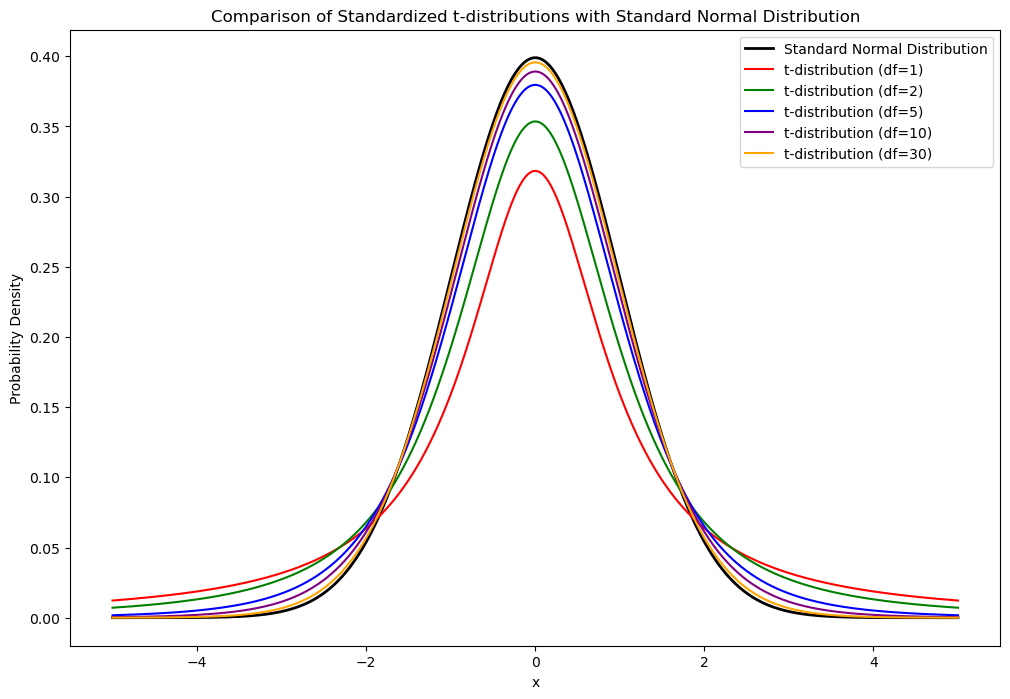

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Create the x-axis values
x = np.linspace(-5, 5, 1000)

# Create a figure and axis object
plt.figure(figsize=(12, 8))

# Plot the standard normal distribution
y_norm = norm.pdf(x, 0, 1)
plt.plot(x, y_norm, label="Standard Normal Distribution", linewidth=2, color="black")

# Plot the standardized t-distributions with different degrees of freedom
dfs = [1, 2, 5, 10, 30]
colors = ['red', 'green', 'blue', 'purple', 'orange']

for df, color in zip(dfs, colors):
    y_t = t.pdf(x, df)
    plt.plot(x, y_t, label=f"t-distribution (df={df})", color=color)

# Set axis labels and title
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Comparison of Standardized t-distributions with Standard Normal Distribution")

# Add a legend
plt.legend()

# Show the plot
plt.show()


### Curiosity: sampling distribution of probabilities

**Why do we group the samples by their means and not by their probabilities?**
 
In principle, it is possible to use the probability of each individual sample in hypothesis testing, but it's highly impractical for several reasons:

**1. Computational Complexity**: Calculating the probability of each individual sample in large datasets would be computationally intensive. It would require a detailed understanding of the population distribution and specific parameters that might not be easily obtainable.

**2. Lack of Generalization**: Working with individual sample probabilities would make it more challenging to generalize the findings to the broader population. The focus on individual outcomes could lead to a loss of information about overall trends and characteristics of the population.

**3. Difficulty in Interpretation**: Interpreting the probabilities for individual samples can be more complex and less intuitive compared to working with summary statistics like means. It might not readily convey meaningful information about the population's underlying structure.

**4. Dependence on Exact Distribution**: If you were to work with the probability of each individual sample, you'd need to know the exact distribution of the population, which might not always be available or accurately known.

**5. Lack of Established Methods**: Established statistical methods and tests are generally not designed to work with individual probabilities. Adapting or developing new methods to utilize individual probabilities would be a complex task.

**6. Potential for Overfitting**: If you were to focus too closely on individual probabilities, you might end up overfitting your analysis to the specific sample data, leading to conclusions that don't generalize well to the broader population.

**7. Challenges in Handling Different Types of Data**: Different types of data (e.g., continuous vs. categorical) might require entirely different approaches if working with individual probabilities, adding to the complexity.

If we look at the data, we can see that since the samples are symmetric, samples with the same distance in the left and right will have the same probability and will be summed together and probability will always range from 0 to 1.

In [11]:
dnormal_distribution['Prob'] = dnormal_distribution['Total counts'] / dnormal_distribution['Total counts'].sum()

def create_df_all_combinations_with_replacement(df, sample_size):
    """Calculate all possible combinations (with repetition) of obs and their mean."""
    all_combs = list(product(df['X'].unique(), repeat=sample_size))
    probabilities = [reduce(lambda x, y: x * y, [df.loc[df['X'] == obs, 'Prob'].iloc[0] for obs in comb]) for comb in all_combs]

    columns = [f"Score {i+1}" for i in range(sample_size)] + ['Mean', 'Probability']
    df_combinations = pd.DataFrame(all_combs, columns=columns[:-2])
    df_combinations['Mean'] = df_combinations.mean(axis=1).round(2)
    df_combinations['Probability'] = probabilities
    first_index = "Combination(s) 1"
    other_indices = [f"{i+1}" for i in range(1, len(all_combs))]
    df_combinations.index = [first_index] + other_indices
    return df_combinations

def plot_distributions(sample_size):
    dfs = {'human heights': create_df_all_combinations_with_replacement(dnormal_distribution, sample_size)}

    for title, df in dfs.items():
        mean_counts = df.groupby('Mean').size().reset_index(name='Counts')
        prob_counts = df.groupby('Probability').size().reset_index(name='Counts')

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

        # Plot of sampling distribution of sample means
        ax1.scatter(mean_counts['Mean'], mean_counts['Counts'], alpha=0.7, s=50)
        ax1.plot(mean_counts['Mean'], mean_counts['Counts'], color='blue', linewidth=0.8)
        for _, row in mean_counts.iterrows():
            ax1.plot([row['Mean'], row['Mean']], [0, row['Counts']], linestyle='--', color='grey', linewidth=0.5)
        ax1.set_title(f"Sampling distribution of sample means (n = {sample_size})")
        ax1.set_xlabel('Mean')
        ax1.set_ylabel('Count')

        # Plot of sampling distribution of probabilities
        ax2.scatter(prob_counts['Probability'], prob_counts['Counts'], alpha=0.7, s=50)
        ax2.plot(prob_counts['Probability'], prob_counts['Counts'], color='red', linewidth=0.8)
        for _, row in prob_counts.iterrows():
            ax2.plot([row['Probability'], row['Probability']], [0, row['Counts']], linestyle='--', color='grey', linewidth=0.5)
        ax2.set_title(f"Sampling distribution of probabilities (n = {sample_size})")
        ax2.set_xlabel('Probability')
        ax2.set_ylabel('Count')

        plt.tight_layout()
        plt.show()

        display(df)

max_sample_size = sum(counts_bins) + 5
interact(plot_distributions, sample_size=(1, max_sample_size, 1));

interactive(children=(IntSlider(value=8, description='sample_size', max=16, min=1), Output()), _dom_classes=('…

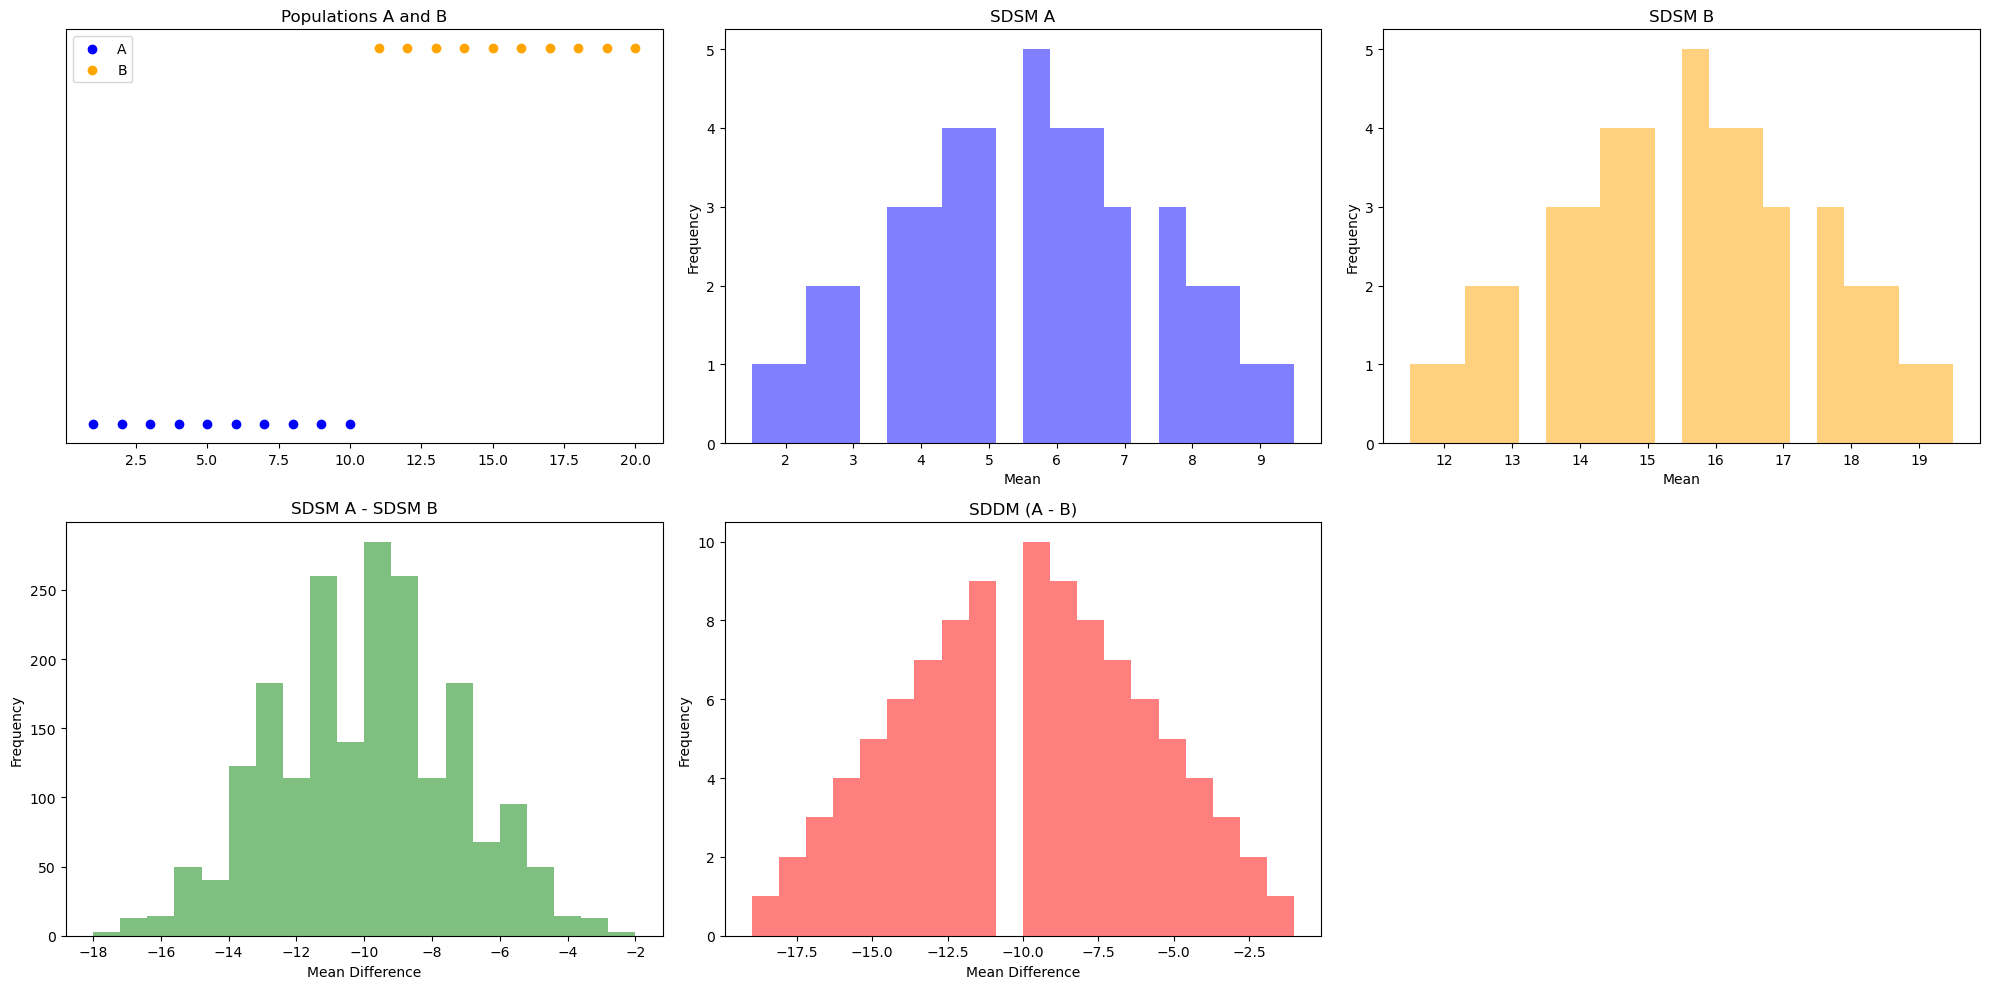

,Difference,Comb_A,Comb_B
0,-10.0,"(1, 2)","(11, 12)"
1,-10.5,"(1, 2)","(11, 13)"
2,-11.0,"(1, 2)","(11, 14)"
3,-11.5,"(1, 2)","(11, 15)"
4,-12.0,"(1, 2)","(11, 16)"
...,...,...,...
2020,-8.5,"(9, 10)","(17, 19)"
2021,-9.0,"(9, 10)","(17, 20)"
2022,-9.0,"(9, 10)","(18, 19)"
2023,-9.5,"(9, 10)","(18, 20)"


,Combination,Mean Difference
0,"(1, 11)",-10
1,"(1, 12)",-11
2,"(1, 13)",-12
3,"(1, 14)",-13
4,"(1, 15)",-14
...,...,...
95,"(10, 16)",-6
96,"(10, 17)",-7
97,"(10, 18)",-8
98,"(10, 19)",-9


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

# Define two populations A and B, each with 10 integer elements
A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
B = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Generate all possible combinations of 2 elements for A and B
comb_A = list(itertools.combinations(A, 2))
comb_B = list(itertools.combinations(B, 2))

# Calculate means for all combinations for A and B, and store them in dataframes
df_A = pd.DataFrame({'Combination': comb_A, 'Mean': [np.mean(c) for c in comb_A]})
df_B = pd.DataFrame({'Combination': comb_B, 'Mean': [np.mean(c) for c in comb_B]})

# Calculate difference between all possible means in A and B
df_diff_means_A_B = pd.DataFrame({'Difference': [a - b for a in df_A['Mean'] for b in df_B['Mean']],
                                  'Comb_A': [a for a in df_A['Combination'] for _ in df_B['Combination']],
                                  'Comb_B': [b for _ in df_A['Combination'] for b in df_B['Combination']]})

# Calculate mean of the differences for all combinations of 2 elements from A and B
diff_comb = list(itertools.product(A, B))
df_sddm_A_B = pd.DataFrame({'Combination': [(a, b) for (a, b) in diff_comb],
                            'Mean Difference': [(a - b) for (a, b) in diff_comb]})

# Plotting
plt.figure(figsize=(20, 10))

# Scatter plot for A and B
plt.subplot(2, 3, 1)
plt.scatter(A, [1]*len(A), c='blue', label='A')
plt.scatter(B, [2]*len(B), c='orange', label='B')
plt.title('Populations A and B')
plt.yticks([])
plt.legend()

# Histogram for SDSM A
plt.subplot(2, 3, 2)
plt.hist(df_A['Mean'], bins=20, alpha=0.5, label='SDSM A', color='blue')
plt.title('SDSM A')
plt.xlabel('Mean')
plt.ylabel('Frequency')

# Histogram for SDSM B
plt.subplot(2, 3, 3)
plt.hist(df_B['Mean'], bins=20, alpha=0.5, label='SDSM B', color='orange')
plt.title('SDSM B')
plt.xlabel('Mean')
plt.ylabel('Frequency')

# Histogram for difference of means (SDSM A - SDSM B)
plt.subplot(2, 3, 4)
plt.hist(df_diff_means_A_B['Difference'], bins=20, alpha=0.5, label='SDSM A - SDSM B', color='green')
plt.title('SDSM A - SDSM B')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')

# Histogram for SDDM (A - B)
plt.subplot(2, 3, 5)
plt.hist(df_sddm_A_B['Mean Difference'], bins=20, alpha=0.5, label='SDDM (A - B)', color='red')
plt.title('SDDM (A - B)')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

display(df_diff_means_A_B)
display(df_sddm_A_B)